In [3]:
# ls *.csv

In [5]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
raw = pd.read_csv('MKTCAP_GR.csv', encoding = 'cp932').dropna()
raw.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
0,2000,2HRA,0.000,43.9143,3.2794,3.2482,34.0403,4.4293,1.0819,17.3527,...,11.8415,-9.3213,14.6434,17.1636,0.191067,inf,inf,0.133741,-0.792145,0.000
1,2000,A1OS,0.000,40.9510,0.2350,-0.7530,44.2850,1.7340,4.4300,19.6690,...,13.5050,-12.8700,12.8810,13.5160,0.017387,inf,inf,0.008256,0.183450,0.000
2,2000,AAA,0.000,10.9207,3.0013,2.0257,83.9710,0.0793,0.0000,0.0000,...,-0.0793,8.0549,78.5441,86.5197,0.034689,inf,inf,0.035742,0.064360,0.000
3,2000,AAD,91.902,34.2833,4.7588,2.6313,24.5565,17.7117,0.0000,21.2303,...,3.5186,-5.9551,1.2367,-1.1998,-3.966328,0.051781,-3.517914,0.280107,0.064143,91.902
4,2000,AAH,0.000,379.5033,31.3202,14.7845,264.9924,20.2257,0.9137,158.0551,...,136.9157,-43.4373,43.3560,136.8344,0.228891,inf,inf,0.149144,0.396824,0.000


In [15]:
# slice data fields with MKTCAP
fields = raw.loc[:, '時価総額':'使用資産']
# print (fields.shape[1])

# remove all zero columns. i.e. keep columns that have more than one zero values 
data = fields.loc[:, (fields != 0).any(axis = 0)]
# data.shape[1]
data.columns

Index(['時価総額', '売上', '営業利益', '純利益', '総資産', '現金･現金同等物', '有価証券', '流動資産', '総長期投資',
       '有形固定資産', '短期借入金', '長期借入金', '流動負債', '無形資産', '未払税金', '短期繰延税金資産', '長期貸付金',
       '従業員数', '売上総利益', '土地2', '売掛金', '棚卸', '買掛金', 'のれん･営業権', '貸倒引当金', '剰余金',
       '資本金', '売上原価', '負債合計', '自己資本', '未払費用', '長期繰延税金負債', '長期借入金(当期返済分)',
       '少数持分', '自己株金額', '人件費', '税引前利益', '非流動資産合計', '自己株式数', '発行済株式数',
       '流動資産その他', '投資資産', '無形資産その他', '投資資産その他', '流動負債その他', '固定負債', '固定負債その他',
       '自己資本その他', '株主資本', '販管費', '売上総利益率', '営業利益率', '純現金資産', '営業資産', '営業負債',
       '有形固定', '使用資産'],
      dtype='object')

### pearson correlation coefficients r assumptions
- normally distributed data, at least approximatly 
- homoscedasticity of data 
- outlisers should be adjusted as the test is sensitive to outliers 
- data should be either interval or ratio measurements
- the underlying relationship between the two variables should be linear  

-- variables do not have to be of the same unit. i.e. the test can be used to measure correlaion bewteen age and blood pressure 

### use the pearson r to check if the data fields are linearly correlated
- this test does not imply causality 

### approximate normality
- histogram of the variables
- scipy.stats.kstest for two sided  Kolmogorov-Smirnov test for goodness of fit

In [30]:
from scipy import stats 

## none of the variables are actually noramlly distributed, probably due to the outliers  

# two sided ks test for all data fields
for i in range(data.shape[1]):
#     print (data.iloc[:, i].shape[0])
    print (stats.kstest(data.iloc[:, i], 'norm', alternative='two-sided'))

KstestResult(statistic=0.52421872294887373, pvalue=0.0)
KstestResult(statistic=0.93462659876013676, pvalue=0.0)
KstestResult(statistic=0.5644280758354423, pvalue=0.0)
KstestResult(statistic=0.49261710530139208, pvalue=0.0)
KstestResult(statistic=0.96356443965709548, pvalue=0.0)
KstestResult(statistic=0.74560575244901195, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.89535688385747336, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.72491866593717524, pvalue=0.0)
KstestResult(statistic=0.56507134905384104, pvalue=0.0)
KstestResult(statistic=0.60405553100824216, pvalue=0.0)
KstestResult(statistic=0.85576920553491731, pvalue=0.0)
KstestResult(statistic=0.54794560035168671, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.9477375179145755, pvalue=0.0)
KstestResult(statistic=0.49643200219569095, pvalue=0.0)
KstestResult(stati

### check for outliers for pearson correlation coefficient r test 
- scatter plot between each pair of the data fields variables 
- quantile plots with whisk from Tukey for each single data field variable 

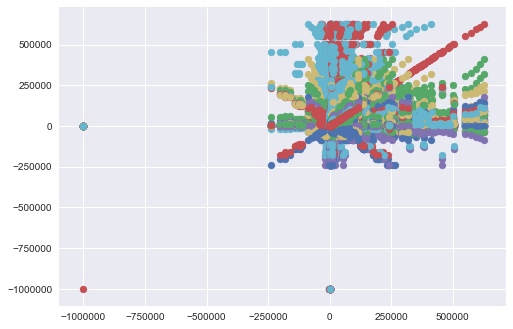

In [64]:
## scatter plots 
num = len(data.columns)

for i in range(num):
    for j in range(num):
        plt.scatter(data.iloc[:, i], data.iloc[:, j]) 

In [56]:
## quantiles 

def outliers(x):
    quantile_1, quantile_3 = np.percentile(x, [25, 75])
    iqr = quantile_3 - quantile_1
    lower = quantile_1 - (iqr * 1.5)
    upper = quantile_3 + (iqr * 1.5)
    
#     if (np.where((x > upper) | (x < lower))) != 0:
#         return 1 
    return np.where ((x > upper) | (x  < lower))

In [57]:
var_outliers = []
for i in range(len(data.columns)):
    var_outliers.append(outliers(data.iloc[:, i])) 

[(array([  25,   43,   66, ..., 7284, 7285, 7286], dtype=int64),),
 (array([  13,   25,   29, ..., 7284, 7285, 7286], dtype=int64),),
 (array([  10,   13,   14, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  10,   13,   14, ..., 7282, 7283, 7286], dtype=int64),),
 (array([  13,   25,   29, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  10,   25,   29, ..., 7282, 7284, 7286], dtype=int64),),
 (array([  10,   11,   13, ..., 7283, 7285, 7286], dtype=int64),),
 (array([  13,   25,   29, ..., 7284, 7285, 7286], dtype=int64),),
 (array([  10,   17,   21, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  21,   25,   29, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  13,   21,   29, ..., 7279, 7284, 7286], dtype=int64),),
 (array([  13,   21,   29, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  13,   21,   25, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  25,   30,   56, ..., 7279, 7284, 7286], dtype=int64),),
 (array([1455, 1466, 1828, 1839, 2675, 3404, 3478, 3551, 3559,